In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Pre-processing is a crucial step in data analysis, and prevents us from having to deals with hassles later (or at least some of them). Post processing, the data may be in some inconvenient form and separating the good from the bad may be a harder task.

### One important task pre-processing is to weed out outliers. Sometimes we over-do this step and make our data look as "nice as possible." So we have to proceed with caution.

## 5.1 z-score filtering

### One of the most basic steps to filter out the outlier is to see "how far from the mean it is." But this distance should always take into account the variance of the data itself, because high variance allows us greater leeway because of the nature of the data. So we can just compute $z = \frac{|x_i - \mu|}{\sigma}$, and then filter out accordingly. Of course, the big assumption here is that our data is normally distributed. Which is more than often not the case.

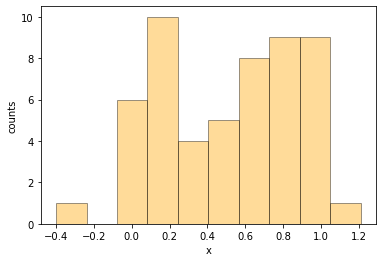

In [15]:
n = 50
x = [np.random.uniform(0,1) for i in range(n)] #flat distribution
x+= [1.21, -0.4, 1.]
plt.xlabel('x')
plt.ylabel('counts')
plt.hist(x, color = 'orange', alpha = .4, edgecolor='black', linewidth=1.);

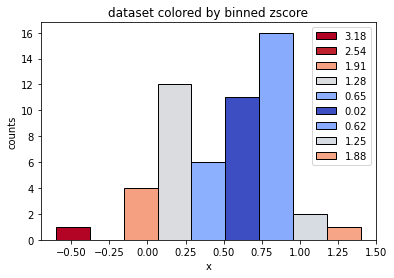

In [51]:
mu = np.mean(x)
stdev = np.std(x)
z_score = [abs(x[i] - mu)/stdev for i in range(len(x))]
max_z_score = np.max(z_score)

fig, ax = plt.subplots()
cnts, values, bars = ax.hist(x, edgecolor='k', bins=np.linspace(-0.6, 1.4, 10))
cmap = plt.cm.coolwarm
for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    zscore = abs(value-mu)/stdev
    bar.set_facecolor(cmap(zscore/max_z_score))
    bar.set_label(np.round(zscore,2))
plt.xlabel('x')
plt.ylabel('counts')
plt.title('dataset colored by binned zscore')
plt.legend();

### And then, it's a simple matter of filtering (say we can filter points that lie in a bin with z-score > 3.). But this is an overly simplistic method, with several flaws (namely, that it doesn't care about the distribution and would work best for normally distributed data)

## 5.2 Isolation Forest
### Recall Random Forest. We used decision trees, to build the algorithm. We proceed similarly, where the deeper into the tree we go, the harder it is to differentiate between samples. Since outliers and few and distinguishable in some manner, they are likely to be the samples that are found on the shorter branches.

### We'll simply use scikit-learn's method to get outliers via IF

In [52]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from numpy import quantile, random, where

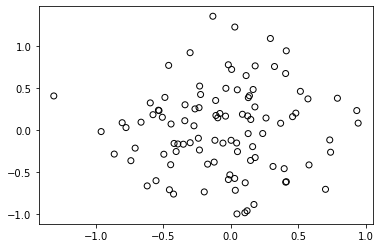

In [55]:
#let's use the blob function to get a dataset with random points
random.seed(42)
X, _ = make_blobs(n_samples=100, centers=1, cluster_std=.5, center_box=(0, 0))

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="o", facecolor = "None", s=36, edgecolor="k");

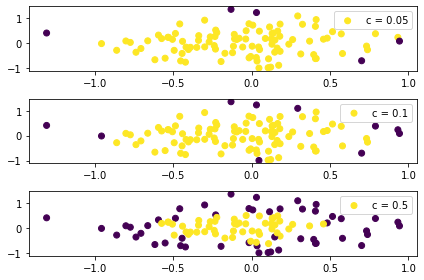

In [70]:
fig, axs = plt.subplots(3)
clist = [0.05, 0.1, 0.5]
for i in range(3):
    model = IsolationForest(n_estimators=50, contamination=clist[i])
    predictions = model.fit_predict(X) #-1 values are the outliers
    axs[i].scatter(X[:, 0], X[:, 1], marker="o", s=36, c = predictions, \
                   label = 'c = {}'.format(clist[i]))
    axs[i].legend()
fig.tight_layout()

### In general, the contamination rate can be treated as a tunable hyperparameter, but if one knows the number of outliers, then we can simply guess $c$

### In reality, we may be analyzing data that may be modeled, and not just some random distribution of points. 

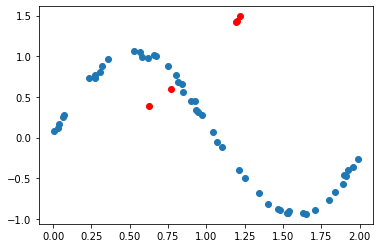

In [94]:
random.seed(12)
n = 50
x = [np.random.uniform(0,2) for i in range(n)]
y = [np.random.uniform(0, 0.1) + np.sin(xq*3.) for xq in x]
plt.scatter(x, y);
x+= [np.random.uniform(0,2) for i in range(5)]
y+= [(x[i])**2 for i in range(len(x)-5, len(x))]
plt.scatter(x[len(x)-5: len(x)], y[len(x)-5: len(x)], c = 'r')

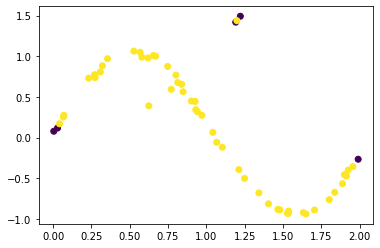

In [98]:
X = np.array([x, y]).T
model = IsolationForest(n_estimators=50, contamination=5/55)
predictions = model.fit_predict(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker="o", s=36, c = predictions)

### Clearly isolation forest doesn't get the job done as expected, here.